In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pickle

# Открываем файл 
with open('y_obj_companies_2015.pkl', 'rb') as f:
    # Загружаем данные из файла с помощью функции load()
    data = pickle.load(f)

# Теперь переменная data содержит данные из файла
data.head(5)

,id,entity_id,name,normalized_name,category_code,status,founded_at,closed_at,domain,homepage_url,...,linkcut,category_list,crunchbase_profile,country,founders,investors,address,state,seed_profile,y_combinator_year
0,c:1,1.0,Wetpaint,wetpaint,web,2.0,2005-10-17,NaT,wetpaint-inc.com,http://wetpaint-inc.com,...,wetpaint,"[Curated Web, Web Tools]",http://www.crunchbase.com/organization/wetpaint,United States,NaN,NaN,NaN,NaN,NaN,NaT
1,c:10,10.0,Flektor,flektor,games_video,2.0,NaT,NaT,flektor.com,http://www.flektor.com,...,flektor,NaN,http://www.crunchbase.com/company/flektor,United States,NaN,NaN,NaN,NaN,NaN,NaT
2,c:100,100.0,There,there,games_video,2.0,NaT,NaT,there.com,http://www.there.com,...,there,NaN,http://www.crunchbase.com/company/there,United States,NaN,NaN,NaN,NaN,NaN,NaT
3,c:10000,10000.0,MYWEBBO,mywebbo,network_hosting,1.0,2008-07-26,NaT,mywebbo.com,http://www.mywebbo.com,...,mywebbo,NaN,http://www.crunchbase.com/company/mywebbo,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,c:10001,10001.0,THE Movie Streamer,the movie streamer,games_video,1.0,2008-07-26,NaT,themoviestreamer.com,http://themoviestreamer.com,...,the-movie-streamer,NaN,http://www.crunchbase.com/company/the-movie-st...,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Text(0.5, 1.0, 'Status vs Funding total usd')

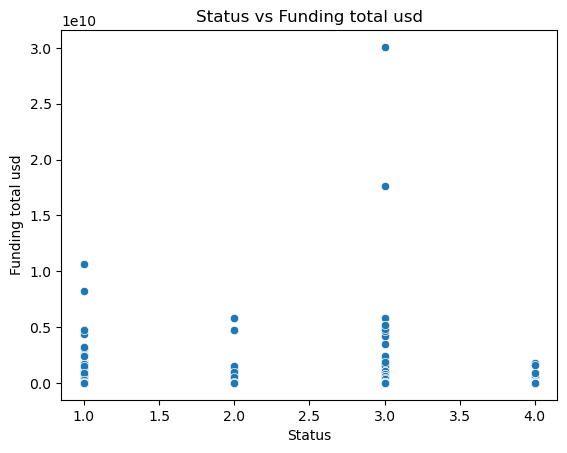

In [5]:
sns.scatterplot(x=data['status'], y=data['funding_total_usd'])

plt.xlabel('Status')
plt.ylabel('Funding total usd')
plt.title('Status vs Funding total usd')

Text(0.5, 1.0, 'Status vs Funding total usd')

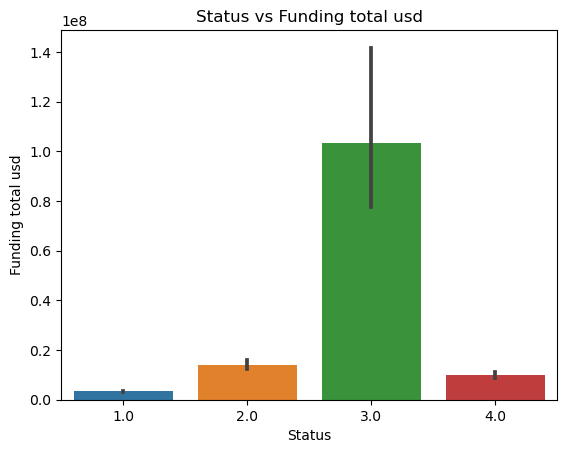

In [6]:
sns.barplot(x=data['status'], y=data['funding_total_usd'])

plt.xlabel('Status')
plt.ylabel('Funding total usd')
plt.title('Status vs Funding total usd')

In [7]:
# функция, извлекающая год основания из даты
def extract_year(date):
    if pd.isna(date):
        return None
    else:
        return date.year

# создаем столбец 'year', содержащий год из даты или None, если дата не проставлена
data['foundation year'] = data['founded_at'].apply(lambda x: extract_year(x))
data['closing year'] = data['closed_at'].apply(lambda x: extract_year(x))

Text(0.5, 1.0, 'Foundation year')

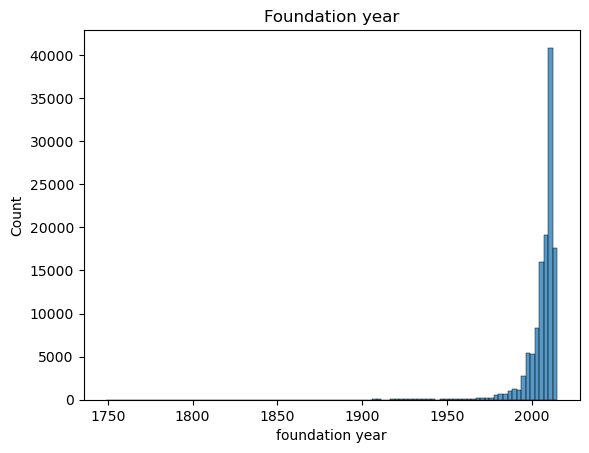

In [9]:
sns.histplot(data=data['foundation year'], bins=100)
plt.xlabel('foundation year')
plt.ylabel('Count')
plt.title('Foundation year')

Text(0.5, 1.0, 'Funding rounds')

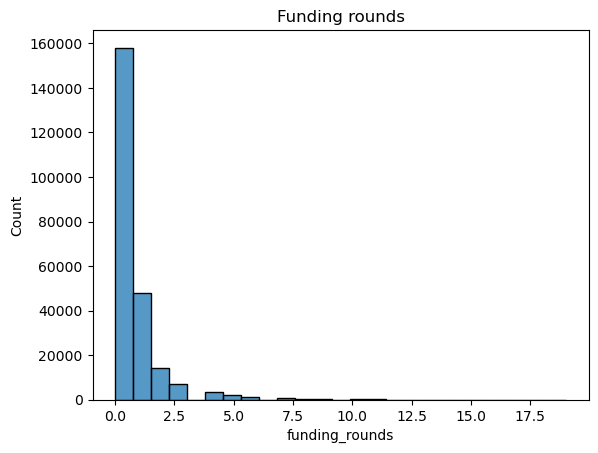

In [11]:
sns.histplot(data=data['funding_rounds'], bins=25)
plt.xlabel('funding_rounds')
plt.ylabel('Count')
plt.title('Funding rounds')

Text(0.5, 1.0, 'Foundation year vs Funding total usd')

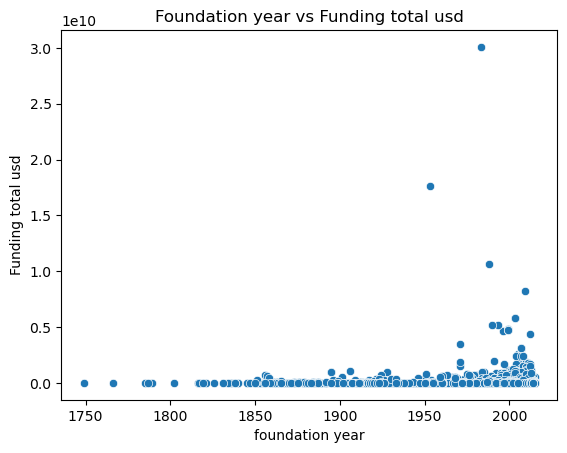

In [12]:
sns.scatterplot(x=data['foundation year'], y=data['funding_total_usd'])

plt.xlabel('foundation year')
plt.ylabel('Funding total usd')
plt.title('Foundation year vs Funding total usd')

Text(0.5, 1.0, 'Foundation year vs closing year')

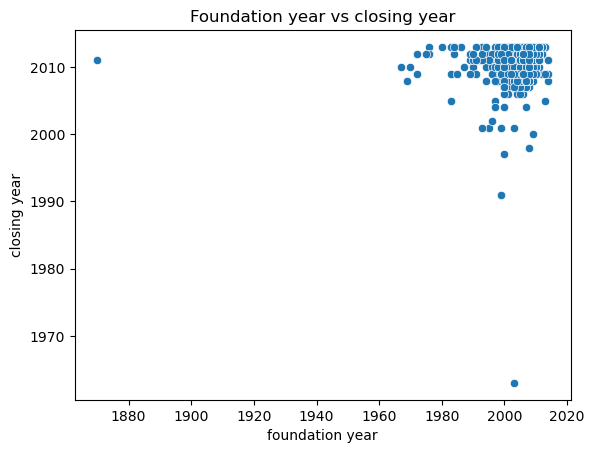

In [18]:
sns.scatterplot(x=data['foundation year'], y=data['closing year'])
plt.xlabel('foundation year')
plt.ylabel('closing year')
plt.title('Foundation year vs closing year')


In [23]:
Number_of_mentions = data['country'].value_counts() # создаем список стран по количеству

In [24]:
df = pd.DataFrame({'Country':Number_of_mentions.index, 'Total':Number_of_mentions.values}) # создаем новый датафрейм    
df.head(10)

,Country,Total
0,United States,73619
1,United Kingdom,9668
2,India,5079
3,Canada,4844
4,Germany,2473
5,France,2170
6,China,2070
7,Australia,1747
8,Israel,1568
9,Spain,1515


In [25]:
import chart_studio.plotly as py # импортируем библиотеки
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [26]:
data1 = dict(type = 'choropleth', # рисуем гео карту
           locations = df['Country'],
           locationmode = 'country names',
           colorscale="Viridis",
           reversescale = True,
           z = df['Total'],
           text = df['Country'],
           colorbar = {'title' : 'Startups per country'})

In [27]:
layout = dict(title = 'Общее количество стартапов', # рисуем гео карту
              geo = dict(showframe = False,
                        projection = {'type' : 'natural earth'}))

In [28]:
choromap = go.Figure(data = [data1],layout = layout) # рисуем гео карту
iplot(choromap)